In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bluff nz
sitka us
mataura pf
ushuaia ar
alice springs au
pevek ru
rikitea pf
mataura pf
puerto escondido mx
nikolskoye ru
ushuaia ar
dayong cn
henties bay na
punta arenas cl
vila vu
vimperk cz
port alfred za
mataura pf
tiksi ru
chipinge zw
cantaura ve
pochutla mx
hermanus za
kamenka ru
wexford ie
cape town za
busselton au
albany au
ushuaia ar
dunedin nz
carnarvon au
ushuaia ar
komsomolskiy ru
bluff nz
amderma ru
saskylakh ru
sesheke zm
tuktoyaktuk ca
ribeira brava pt
cape town za
luderitz na
north bend us
ushuaia ar
tsihombe mg
puerto ayora ec
olafsvik is
grindavik is
altus us
januaria br
huilong cn
rikitea pf
port alfred za
rikitea pf
nara ml
shache cn
ushuaia ar
lorengau pg
komsomolskiy ru
victoria sc
chumikan ru
attawapiskat ca
busselton au
kodiak us
illoqqortoormiut gl
koumac nc
castro cl
illoqqortoormiut gl
severo-kurilsk ru
sann pk
torbay ca
addis zemen et
illoqqortoormiut gl
hermanus za
dunedin nz
kavieng pg
cherskiy ru
saskylakh ru
rikitea pf
jinchang cn
butaritari ki
punta are

makakilo city us
jamestown sh
east london za
esperance au
new norfolk au
bandarbeyla so
punta arenas cl
hofn is
punta arenas cl
vao nc
ushuaia ar
rikitea pf
qaanaaq gl
busselton au
kirakira sb
nizhneyansk ru
umzimvubu za
bluff nz
tumannyy ru
cascais pt
mataura pf
grand gaube mu
kapaa us
albany au
barrow us
horta pt
arkhangelsk ru
airai pw
punta arenas cl
meulaboh id
gat ly
rikitea pf
russellville us
atar mr
hilo us
lavrentiya ru
rikitea pf
georgetown sh
saskylakh ru
mackay au
plettenberg bay za
maxixe mz
busselton au
hami cn
evensk ru
bredasdorp za
tallahassee us
cape town za
yellowknife ca
saint george bm
tuktoyaktuk ca
brae gb
kloulklubed pw
beyneu kz
mataura pf
belushya guba ru
ulaangom mn
urusha ru
bowen au
taolanaro mg
geraldton au
kapaa us
tsihombe mg
punta arenas cl
taolanaro mg
henties bay na
mataura pf
upernavik gl
busselton au
castro cl
port elizabeth za
amderma ru
lebork pl
shingu jp
taolanaro mg
puerto ayora ec
sentyabrskiy ru
craig us
novonukutskiy ru
butaritari ki
new nor

hermanus za
belushya guba ru
avarua ck
mayya ru
rikitea pf
georgetown sh
rikitea pf
mataura pf
butaritari ki
punta arenas cl
luderitz na
hobart au
chokurdakh ru
dawlatabad af
mentok id
hithadhoo mv
nikolskoye ru
bluff nz
thompson ca
khilok ru
vestmannaeyjar is
port alfred za
nome us
dongsheng cn
halalo wf
nikolskoye ru
ponta do sol pt
bethel us
kapaa us
belushya guba ru
albany au
kuala terengganu my
iquitos pe
laguna br
tasiilaq gl
ambatofinandrahana mg
namibe ao
vieques us
liuli tz
hobart au
nago jp
haines junction ca
hobart au
tromso no
albany au
new norfolk au
san andres co
manali in
bireun id
mount gambier au
berlevag no
sitka us
bocaranga cf
palabuhanratu id
valle del guamuez co
butaritari ki
gravdal no
tuktoyaktuk ca
punta arenas cl
butaritari ki
kapaa us
naron es
ushuaia ar
butaritari ki
kodiak us
nioro ml
faanui pf
poum nc
punta arenas cl
bambous virieux mu


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=94a91564a2c4e6fc6596d6c52b6b17a0


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping..." + city.title())
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 16 of Set 25 | bluff
Processing Record 17 of Set 25 | sitka
Processing Record 18 of Set 25 | mataura
Processing Record 19 of Set 25 | ushuaia
Processing Record 20 of Set 25 | alice springs
Processing Record 21 of Set 25 | pevek
Processing Record 22 of Set 25 | rikitea
Processing Record 23 of Set 25 | puerto escondido
Processing Record 24 of Set 25 | nikolskoye
Processing Record 25 of Set 25 | dayong
Processing Record 26 of Set 25 | henties bay
Processing Record 27 of Set 25 | punta arenas
Processing Record 28 of Set 25 | vila
Processing Record 29 of Set 25 | vimperk
Processing Record 30 of Set 25 | port alfred
Processing Record 31 of Set 25 | tiksi
Processing Record 32 of Set 25 | chipinge
Processing Record 33 of Set 25 | cantaura
Processing Record 34 of Set 25 | pochutla
Processing Record 35 of Set 25 | hermanus
Processing Record 36 of Set 25 | kamenka
Processing Record 37 of Set 25 | wexford
Processing Record 38 of Set 25 | cape town
Processing Record 39 of Set 25 |

Processing Record 31 of Set 28 | thompson
Processing Record 32 of Set 28 | punta alta
Processing Record 33 of Set 28 | grand gaube
Processing Record 34 of Set 28 | touros
Processing Record 35 of Set 28 | burnie
Processing Record 36 of Set 28 | rongai
Processing Record 37 of Set 28 | huarmey
Processing Record 38 of Set 28 | krymsk
Processing Record 39 of Set 28 | port lincoln
Processing Record 40 of Set 28 | kaitangata
Processing Record 41 of Set 28 | airai
Processing Record 42 of Set 28 | port blair
Processing Record 43 of Set 28 | quatre cocos
Processing Record 44 of Set 28 | simao
Processing Record 45 of Set 28 | cayenne
Processing Record 46 of Set 28 | ibra
Processing Record 47 of Set 28 | sarangani
Processing Record 48 of Set 28 | hambantota
Processing Record 49 of Set 28 | yumen
Processing Record 50 of Set 28 | itarema
Processing Record 1 of Set 29 | marquette
Processing Record 2 of Set 29 | valparaiso
Processing Record 3 of Set 29 | vao
Processing Record 4 of Set 29 | genc
Proces

Processing Record 13 of Set 32 | bethel
Processing Record 14 of Set 32 | buraydah
Processing Record 15 of Set 32 | mareeba
Processing Record 16 of Set 32 | cabo san lucas
Processing Record 17 of Set 32 | wahran
City not found. Skipping...Wahran
Processing Record 18 of Set 32 | onega
Processing Record 19 of Set 32 | puerto colombia
Processing Record 20 of Set 32 | samarai
Processing Record 21 of Set 32 | egvekinot
Processing Record 22 of Set 32 | harer
Processing Record 23 of Set 32 | kumano
Processing Record 24 of Set 32 | marsh harbour
Processing Record 25 of Set 32 | the valley
Processing Record 26 of Set 32 | ostrovnoy
Processing Record 27 of Set 32 | raga
Processing Record 28 of Set 32 | ruteng
Processing Record 29 of Set 32 | mala bilozerka
Processing Record 30 of Set 32 | ghauspur
Processing Record 31 of Set 32 | champerico
Processing Record 32 of Set 32 | codrington
Processing Record 33 of Set 32 | ekhabi
Processing Record 34 of Set 32 | puteyets
Processing Record 35 of Set 32 |

Processing Record 47 of Set 35 | tadine
Processing Record 48 of Set 35 | kankaanpaa
Processing Record 49 of Set 35 | kapchorwa
Processing Record 50 of Set 35 | pascagoula
Processing Record 1 of Set 36 | lolua
City not found. Skipping...Lolua
Processing Record 2 of Set 36 | guymon
Processing Record 3 of Set 36 | sao joao da barra
Processing Record 4 of Set 36 | guarapari
Processing Record 5 of Set 36 | nahrin
Processing Record 6 of Set 36 | tanabe
Processing Record 7 of Set 36 | boali
Processing Record 8 of Set 36 | gurskoye
City not found. Skipping...Gurskoye
Processing Record 9 of Set 36 | kholm
Processing Record 10 of Set 36 | chabahar
Processing Record 11 of Set 36 | pangnirtung
Processing Record 12 of Set 36 | wanning
Processing Record 13 of Set 36 | nome
Processing Record 14 of Set 36 | panama city
Processing Record 15 of Set 36 | vostochnyy
Processing Record 16 of Set 36 | morondava
Processing Record 17 of Set 36 | keokuk
Processing Record 18 of Set 36 | safranbolu
Processing Rec

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Poum,-20.23,164.02,74.70,71,0,6.06,NC,2020-06-17 00:28:44
1,Bluff,-46.60,168.33,46.72,81,100,17.92,NZ,2020-06-17 00:30:38
2,Sitka,57.05,-135.33,51.80,76,90,9.17,US,2020-06-17 00:30:38
3,Mataura,-46.19,168.86,44.60,93,100,8.30,NZ,2020-06-17 00:30:38
4,Ushuaia,-54.80,-68.30,37.40,86,75,21.92,AR,2020-06-17 00:30:38
5,Alice Springs,-23.70,133.88,52.00,43,0,20.27,AU,2020-06-17 00:30:39
6,Pevek,69.70,170.31,46.81,65,95,5.01,RU,2020-06-17 00:30:39
7,Rikitea,-23.12,-134.97,75.72,78,43,14.52,PF,2020-06-17 00:30:39
8,Puerto Escondido,15.85,-97.07,84.20,74,75,2.21,MX,2020-06-17 00:30:39
9,Nikolskoye,59.70,30.79,66.20,88,90,4.47,RU,2020-06-17 00:30:23


In [21]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.loc

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Poum,NC,2020-06-17 00:28:44,-20.23,164.02,74.70,71,0,6.06
1,Bluff,NZ,2020-06-17 00:30:38,-46.60,168.33,46.72,81,100,17.92
2,Sitka,US,2020-06-17 00:30:38,57.05,-135.33,51.80,76,90,9.17
3,Mataura,NZ,2020-06-17 00:30:38,-46.19,168.86,44.60,93,100,8.30
4,Ushuaia,AR,2020-06-17 00:30:38,-54.80,-68.30,37.40,86,75,21.92
...,...,...,...,...,...,...,...,...,...
1128,Valle Del Guamuez,CO,2020-06-17 00:32:39,0.45,-76.92,72.10,95,31,0.72
1129,Gravdal,NO,2020-06-17 00:32:39,68.12,13.50,50.59,76,0,8.79
1130,Naron,ES,2020-06-17 00:32:39,43.52,-8.15,59.00,93,75,3.36
1131,Nioro,GM,2020-06-17 00:30:57,13.35,-15.75,82.83,62,36,8.99


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/17/20'

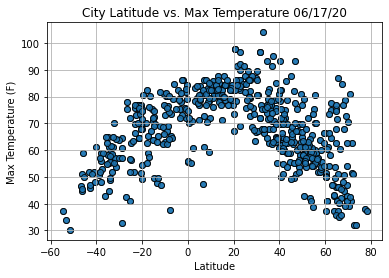

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

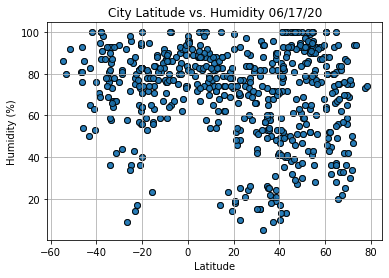

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

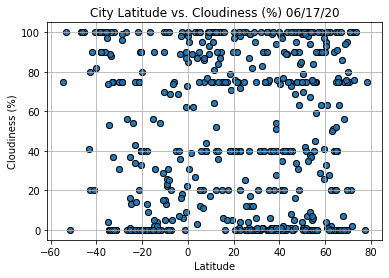

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

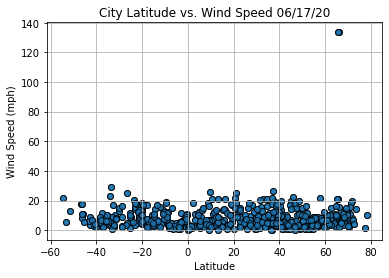

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()